<a href="https://colab.research.google.com/github/GaganSharma0/Assignment1/blob/main/assignment1aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2015_16_Districtwise.csv to 2015_16_Districtwise.csv


In [ ]:
# Load the dataset
import pandas as pd
data_path = '2015_16_Districtwise.csv'
data = pd.read_csv(data_path)
print(data.head())

   AC_YEAR  STATCD  DISTCD         STATNAME  DISTNAME  DISTRICTS  BLOCKS  \
0  2015-16       1     101  JAMMU & KASHMIR   KUPWARA          1      13   
1  2015-16       1     102  JAMMU & KASHMIR  BARAMULA          1      18   
2  2015-16       1     103  JAMMU & KASHMIR  SRINAGAR          1       8   
3  2015-16       1     104  JAMMU & KASHMIR    BADGAM          1      13   
4  2015-16       1     105  JAMMU & KASHMIR   PULWAMA          1       8   

   VILLAGES  CLUSTERS  TOTPOPULAT  ...  UUNI_ALL  UUNI_SC  UUNI_ST  TOTCLS1G  \
0       391       104    875564.0  ...     21322       26     2594      3489   
1       678       144   1015503.0  ...     17307        0     1571      4127   
2        94        65   1269751.0  ...      5444       31      408       817   
3       523       104    735753.0  ...     12469       18      857      2290   
4       359        64    570060.0  ...      7408       17      855      1688   

   TOTCLS2G  TOTCLS3G  TOTCLS4G  TOTCLS5G  TOTCLS6G  TOTCLS7G 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import metrics for regression
# Select features and target variable
features = [
    'SCHTOT', 'SCH1', 'SCH2', 'SCH3',
    'TOTPOPULAT', 'P_SC_POP', 'P_ST_POP', 'SEXRATIO',
    'OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT',
    'TCHTOT', 'TCHTOTG', 'TCHTOTM',
    'AREA_SQKM'
]
target = 'ENRTOT'

# Drop rows with missing values in the selected columns
data = data[features + [target]].dropna()

# Separate features and target
X = data[features]
y = data[target]

#Regression Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Train the model using K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Performance (Regression):")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)
#Classification Model
# Split data for classification (assuming 'ENRTOT' needs to be categorized)
#You might need to define a threshold or use another method for classification
threshold = y.mean()
y_class = (y > threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Initialize and train the classifier
model_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model_classifier.fit(X_train, y_train)

y_pred_class = model_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_class)
print("\nTest Set Performance (Classification):")
print("Accuracy:", accuracy)

Cross-validation R^2 scores: [0.92018038 0.8871655  0.89201754 0.90465962 0.9181202 ]
Mean R^2 score: 0.9044286482200373

Test Set Performance (Regression):
Mean Squared Error: 6780650007.046373
Mean Absolute Error: 47300.734330708656
R^2 Score: 0.9095896515602605

Test Set Performance (Classification):
Accuracy: 0.952755905511811


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb  # Make sure xgboost is installed

# Select features and target variable
features = [
    'SCHTOT', 'SCH1', 'SCH2', 'SCH3',
    'TOTPOPULAT', 'P_SC_POP', 'P_ST_POP', 'SEXRATIO',
    'OVERALL_LI', 'FEMALE_LIT', 'MALE_LIT',
    'TCHTOT', 'TCHTOTG', 'TCHTOTM',
    'AREA_SQKM'
]
target = 'ENRTOT'

# Drop rows with missing values in the selected columns
data = data[features + [target]].dropna()

# Separate features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Cross-validation and evaluation metrics for each model
results = {}
cv_means = []
test_r2_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Train on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results for comparison
    results[name] = {
        'Cross-validation R^2 scores': cv_scores,
        'Mean CV R^2 score': cv_scores.mean(),
        'Test MSE': mse,
        'Test MAE': mae,
        'Test R^2 Score': r2
    }
    cv_means.append(cv_scores.mean())
    test_r2_scores.append(r2)

    print(f"{name} Results:")
    print(f"  - Cross-validation R^2 scores: {cv_scores}")
    print(f"  - Mean CV R^2 score: {cv_scores.mean():.4f}")
    print(f"  - Test Mean Squared Error: {mse:.4f}")
    print(f"  - Test Mean Absolute Error: {mae:.4f}")
    print(f"  - Test R^2 Score: {r2:.4f}")
    print("-" * 50)

# Display final results summary
print("\nSummary of all models:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, np.ndarray):  # For array metrics like CV scores
            print(f"  - {metric_name}: {value}")
        else:
            print(f"  - {metric_name}: {value:.4f}")
    print("-" * 50)


Evaluating Linear Regression...
Linear Regression Results:
  - Cross-validation R^2 scores: [0.83498565 0.85163671 0.86015589 0.85994272 0.90830683]
  - Mean CV R^2 score: 0.8630
  - Test Mean Squared Error: 9588158925.5103
  - Test Mean Absolute Error: 59748.1686
  - Test R^2 Score: 0.8722
--------------------------------------------------
Evaluating Random Forest...
Random Forest Results:
  - Cross-validation R^2 scores: [0.92018038 0.8871655  0.89201754 0.90465962 0.9181202 ]
  - Mean CV R^2 score: 0.9044
  - Test Mean Squared Error: 6780650007.0464
  - Test Mean Absolute Error: 47300.7343
  - Test R^2 Score: 0.9096
--------------------------------------------------
Evaluating Support Vector Regression...
Support Vector Regression Results:
  - Cross-validation R^2 scores: [-0.05109695 -0.01321394 -0.03046593 -0.12798556 -0.09213128]
  - Mean CV R^2 score: -0.0630
  - Test Mean Squared Error: 80091192499.1111
  - Test Mean Absolute Error: 203479.4687
  - Test R^2 Score: -0.0679
-----

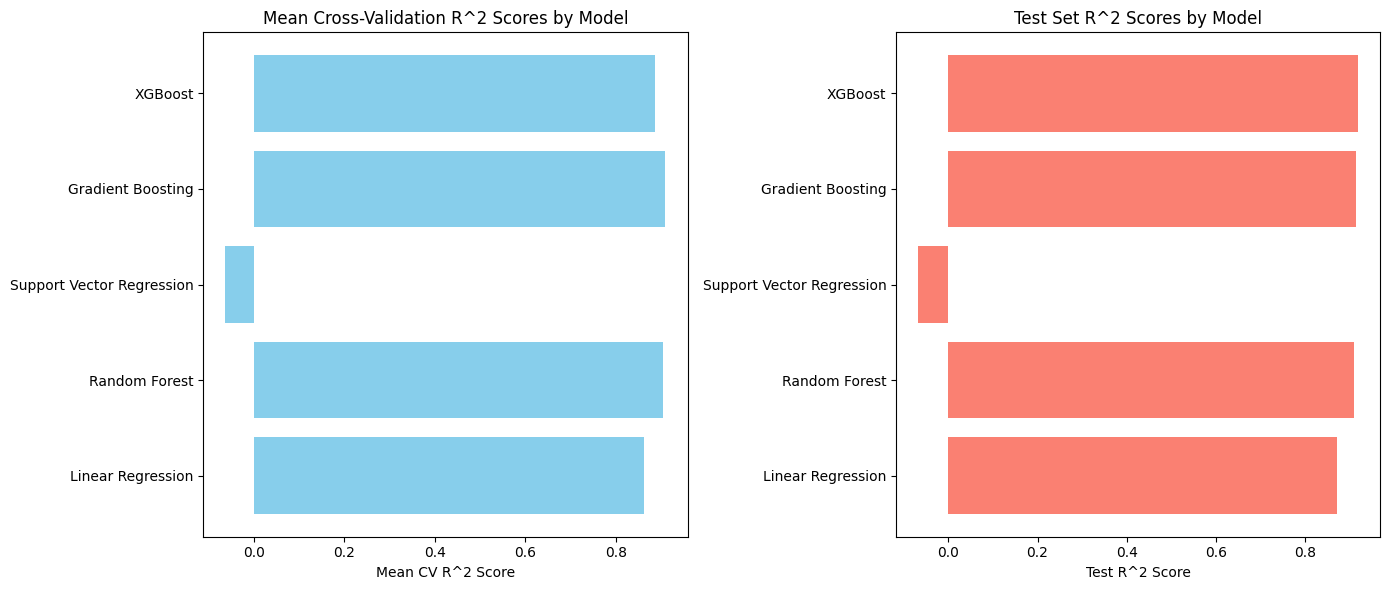

In [ ]:
# Plotting the results
model_names = list(models.keys())

# Plot cross-validation R^2 scores
plt.figure(figsize=(14, 6))

# Cross-validation mean R^2 scores
plt.subplot(1, 2, 1)
plt.barh(model_names, cv_means, color='skyblue')
plt.xlabel("Mean CV R^2 Score")
plt.title("Mean Cross-Validation R^2 Scores by Model")

# Test set R^2 scores
plt.subplot(1, 2, 2)
plt.barh(model_names, test_r2_scores, color='salmon')
plt.xlabel("Test R^2 Score")
plt.title("Test Set R^2 Scores by Model")

plt.tight_layout()
plt.show()

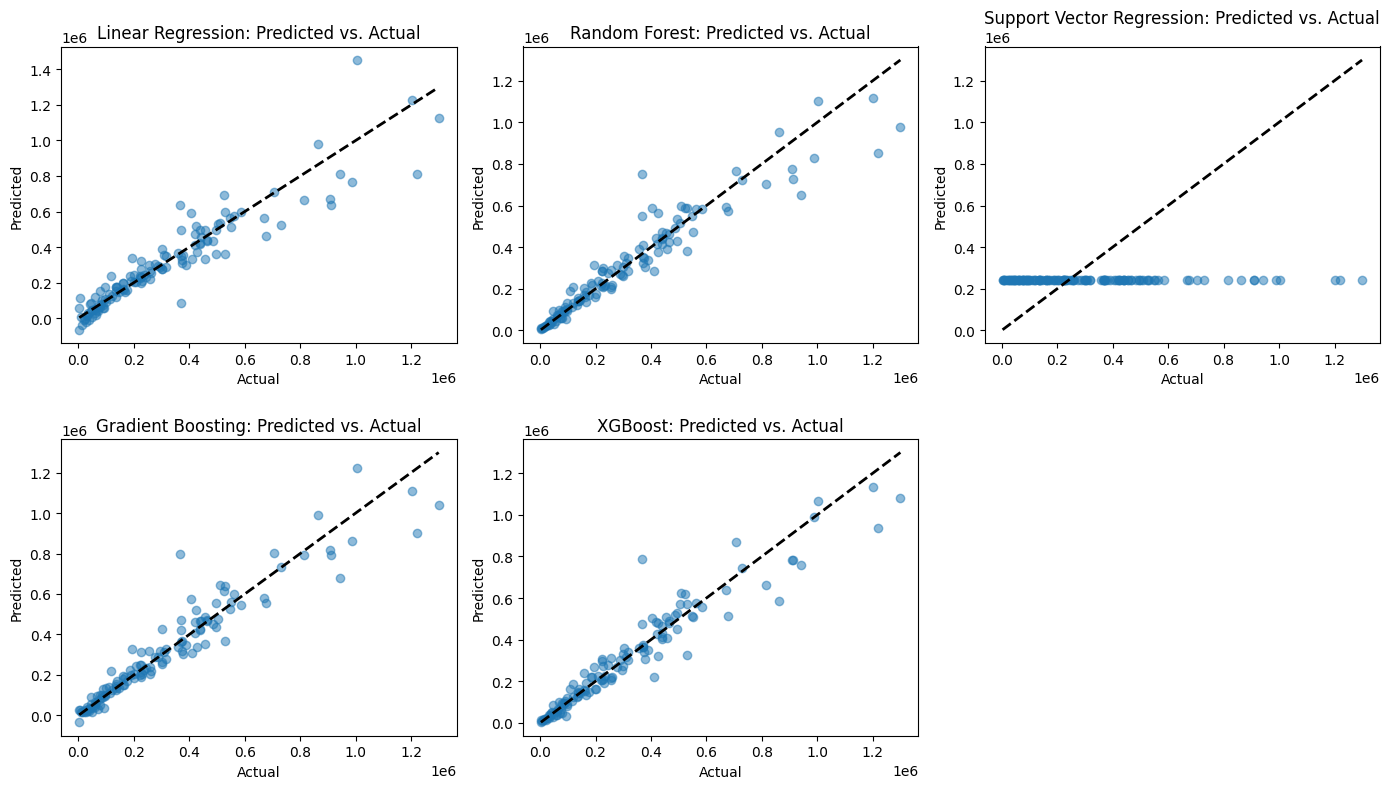

In [ ]:
# Predicted vs. Actual plot for each model
plt.figure(figsize=(14, 8))
for i, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Predicted vs. Actual")
plt.tight_layout()
plt.show()


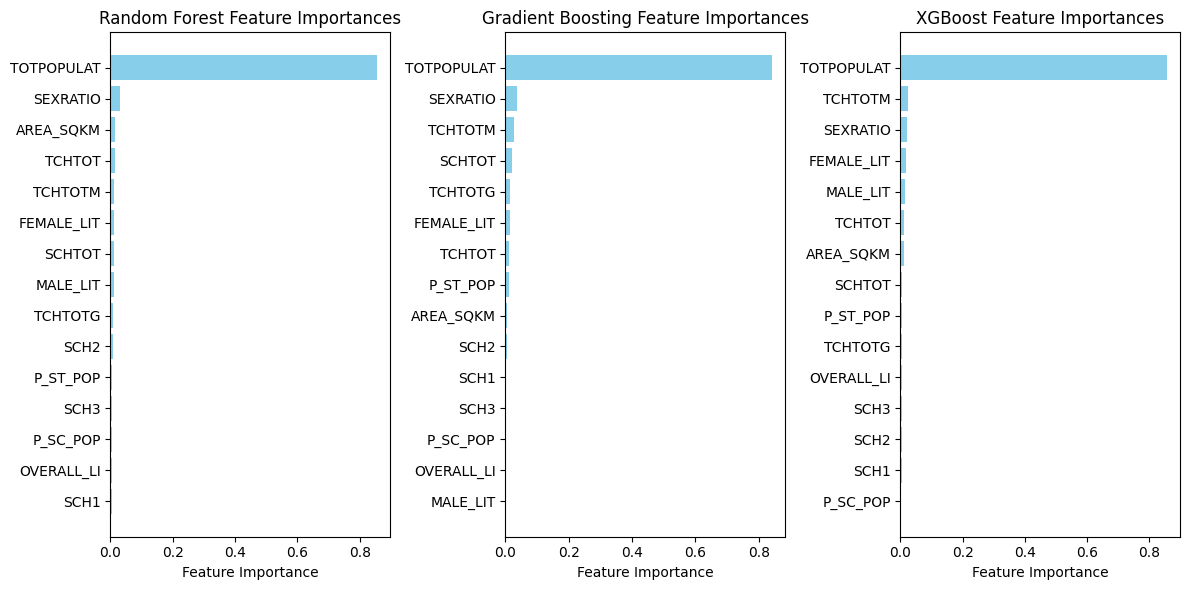

In [ ]:
# Feature importance plot for tree-based models
plt.figure(figsize=(12, 6))
for i, name in enumerate(['Random Forest', 'Gradient Boosting', 'XGBoost'], start=1):
    if name in models:
        model = models[name]
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)
        plt.subplot(1, 3, i)
        plt.barh([features[j] for j in sorted_idx], feature_importances[sorted_idx], color="skyblue")
        plt.xlabel("Feature Importance")
        plt.title(f"{name} Feature Importances")
plt.tight_layout()
plt.show()


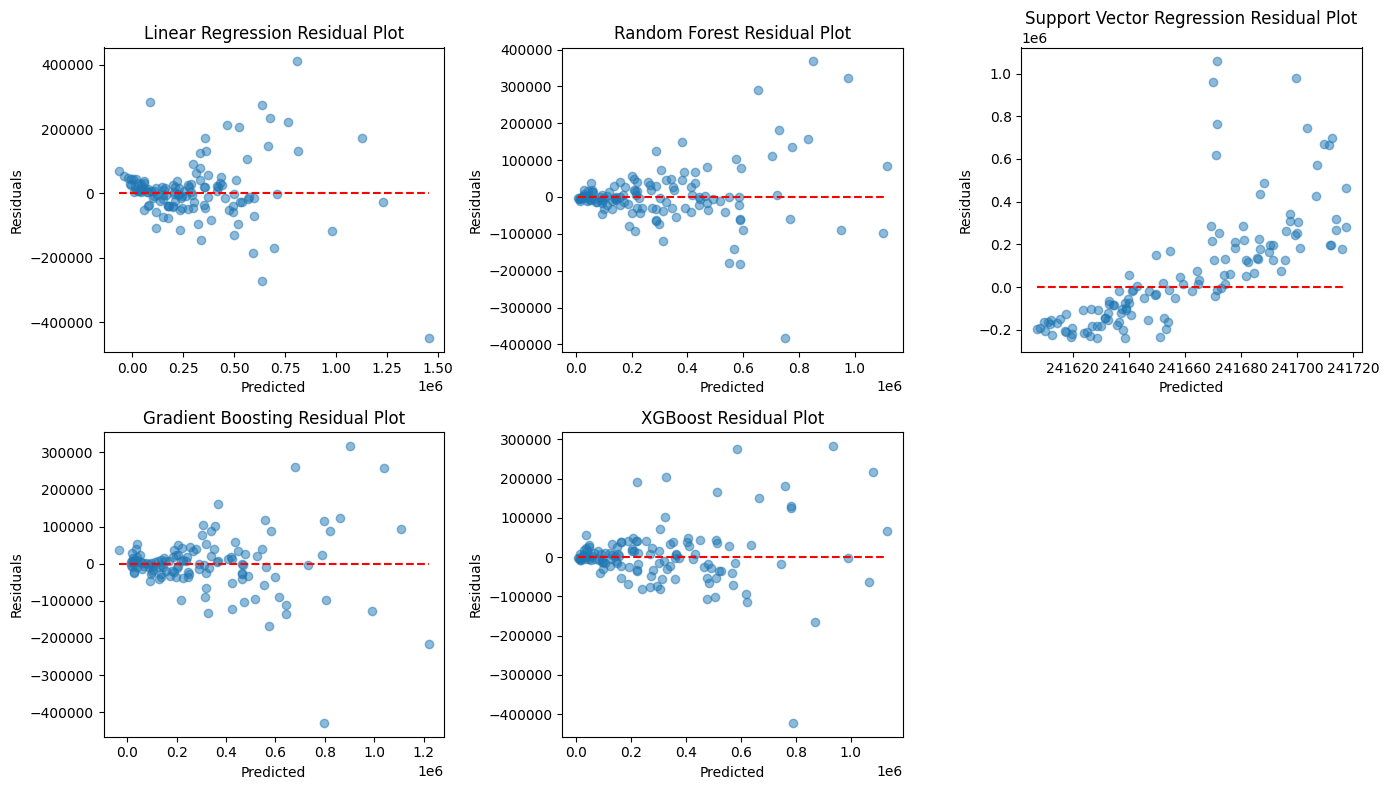

In [ ]:
# Residual plot for each model
plt.figure(figsize=(14, 8))
for i, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{name} Residual Plot")
plt.tight_layout()
plt.show()
